In [1]:
import pandas as pd
conns = pd.read_csv("conns_selected_ML_2022-11-30_10hr-19hr_1mil_intIPs.csv")
conns.head()

,time,src_ip,src_port,dst_ip,dst_port,protocol,state
0,1.669828e+09,2292176147,50714,887035606,443,tcp,SHR
1,1.669828e+09,2292176147,50714,887035606,443,tcp,SHR
2,1.669828e+09,2292176147,50714,887035606,443,tcp,SHR
3,1.669828e+09,2292176147,50714,887035606,443,tcp,SHR
4,1.669828e+09,2292176147,50714,887035606,443,tcp,SHR


In [2]:
conns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   time      1000000 non-null  float64
 1   src_ip    1000000 non-null  int64  
 2   src_port  1000000 non-null  int64  
 3   dst_ip    1000000 non-null  int64  
 4   dst_port  1000000 non-null  int64  
 5   protocol  1000000 non-null  object 
 6   state     1000000 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 53.4+ MB


In [3]:
conns.describe()

,time,src_ip,src_port,dst_ip,dst_port
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000
mean,1.669828e+09,2.111868e+09,51303.158148,1.805591e+09,8722.309554
std,1.231011e+02,6.287822e+08,14009.731283,8.992231e+08,12795.438790
min,1.669813e+09,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.669828e+09,1.547683e+09,50057.000000,8.787658e+08,443.000000
50%,1.669828e+09,2.292176e+09,57116.000000,2.292141e+09,443.000000
75%,1.669828e+09,2.292176e+09,58006.000000,2.292174e+09,15365.000000
max,1.669828e+09,4.373820e+10,65535.000000,4.373820e+10,65535.000000


In [4]:
y = conns[['state']]
y

,state
0,SHR
1,SHR
2,SHR
3,SHR
4,SHR
...,...
999995,RSTOS0
999996,RSTOS0
999997,RSTOS0
999998,RSTOS0


In [5]:
x = conns[conns.columns.drop('state').tolist()]
x

,time,src_ip,src_port,dst_ip,dst_port,protocol
0,1.669828e+09,2292176147,50714,887035606,443,tcp
1,1.669828e+09,2292176147,50714,887035606,443,tcp
2,1.669828e+09,2292176147,50714,887035606,443,tcp
3,1.669828e+09,2292176147,50714,887035606,443,tcp
4,1.669828e+09,2292176147,50714,887035606,443,tcp
...,...,...,...,...,...,...
999995,1.669828e+09,2292176219,56483,1249707494,443,tcp
999996,1.669828e+09,2292176219,56483,1249707494,443,tcp
999997,1.669828e+09,2292176219,56483,1249707494,443,tcp
999998,1.669828e+09,2292176219,56483,1249707494,443,tcp


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, stratify = y, random_state = 1234)

In [7]:
x_train.shape, x_test.shape

((800000, 6), (200000, 6))

In [8]:
x_train = pd.get_dummies(x_train)
x_train.head()

,time,src_ip,src_port,dst_ip,dst_port,protocol_icmp,protocol_tcp,protocol_udp
413921,1.669828e+09,1038135205,30720,2292172550,23,0,1,0
203574,1.669828e+09,2292176363,59025,137212112,443,0,1,0
805449,1.669828e+09,2292176156,55737,2173079714,443,0,1,0
380958,1.669828e+09,1542485755,57116,2292140889,23038,0,1,0
520396,1.669828e+09,2292176370,64815,301801421,443,0,1,0


In [9]:
x_test = pd.get_dummies(x_test)
x_test.head()

,time,src_ip,src_port,dst_ip,dst_port,protocol_icmp,protocol_tcp,protocol_udp
262305,1.669827e+09,2292162686,53594,875381910,443,0,1,0
554645,1.669827e+09,2292176247,61039,1170232605,443,0,1,0
44232,1.669828e+09,2292176185,51263,778373407,443,0,1,0
477260,1.669827e+09,2292176276,55617,1736334469,443,0,1,0
661924,1.669828e+09,2292162803,61644,306308461,443,0,1,0


In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [11]:
model = classifier.fit(x_train, y_train)

In [12]:
model.score(x_test, y_test)

0.771615

In [13]:
model.score(x_train, y_train)

0.90701625

Text(0, 0.5, 'Importance')

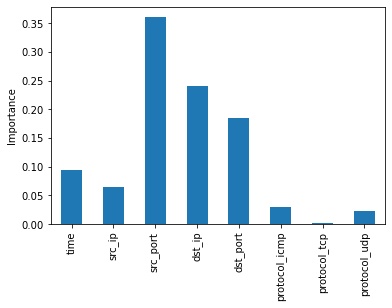

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = x_train.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

In [15]:
importance = model.feature_importances_
importance

array([0.09407909, 0.06484464, 0.36045198, 0.24024938, 0.18550802,
       0.03024706, 0.00126836, 0.02335146])

In [16]:
y_pred = model.predict(x_test)
y_pred

array(['S3', 'OTH', 'RSTOS0', ..., 'S0', 'S0', 'SF'], dtype=object)

In [17]:
from sklearn.model_selection import GridSearchCV
grid_param = {"criterion": ["gini", "entropy"],
              "splitter": ["best", "random"],
              "max_depth":range(2, 50, 1),
              "min_samples_leaf": range(1, 15, 1),
              "min_samples_split": range(2, 20, 1)
              }
grid_search = GridSearchCV(estimator = classifier, param_grid = grid_param, cv = 5, n_jobs = -1)
grid_search.fit(x_train, y_train)
print(grid_search.best_param_)

KeyboardInterrupt: 

In [17]:
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor(random_state = 1234)

In [18]:
# path = classifier.cost_complexity_pruning_path(x_train, y_train)
# ccp_alphas,impurities = path.ccp_alphas,path.impurities
# ccp_alphas = [ccpa for ccpa in ccp_alphas if ccpa > 0]

In [ ]:
# list(ccp_alphas).count()

In [18]:
# list(impurities)

In [19]:
# clfs = [] #will store all the models here
# for ccp_alpha in ccp_alphas:
#     clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
#     clf.fit(x_train, y_train)
#     clfs.append(clf)
# print("Last node in Decision Tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [20]:
# train_scores, test_scores = [], []
# for alpha in ccp_alphas:
#     clf = DecisionTreeClassifier(random_state = 1234, ccp_alpha = alpha)
#     model_ = classifier.fit(x_train, y_train)
#     train_scores.append(model_.score(x_train, y_train))
#     test_scores.append(model_.score(x_test, y_test))